In [1]:
import pandas as pd

In [31]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, Polygon
%matplotlib inline

In [50]:
 from mpl_toolkits.axes_grid1 import make_axes_locatable

Import USDA data on honey bee colony loss by quarter for 2020 (note there is no Q2 data in this dataset). Let's focus on the first quarter because many bee colonies don't make it through the winter.

In [10]:
colonies=pd.read_csv('hcny_2020.csv')

In [16]:
colonies

,State,colonies # Q1,Maximum colonies # Q1,Lost colonies # Q1,Percent lost % Q1,Added colonies # Q1,Renovated colonies # Q1,Percent renovated % Q1,colonies # Q3,Maximum colonies # Q3,...,Added colonies # Q3,Renovated colonies # Q3,Percent renovated % Q3,colonies # Q4,Maximum colonies # Q4,Lost colonies # Q4,Percent lost % Q4,Added colonies # Q4,Renovated colonies # Q4,Percent renovated % Q4
0,Alabama,5500.0,5500,650.0,12,800,200,4,7000.0,7000,...,160.0,330.0,5.0,6000.0,6000,660.0,11.0,240,70,1
1,Arizona,22000.0,22000,2500.0,11,430,90,(Z),26000.0,30000,...,5500.0,3800.0,13.0,34000.0,36000,7000.0,19.0,300,300,1
2,Arkansas,28000.0,28000,6500.0,23,20,20,(Z),20000.0,21000,...,170.0,680.0,3.0,19000.0,19500,1600.0,8.0,430,310,2
3,California,1140000.0,1580000,235000.0,15,83000,86000,5,650000.0,700000,...,87000.0,108000.0,15.0,700000.0,1300000,136000.0,10.0,160000,37000,3
4,Colorado,5000.0,7500,320.0,4,-,-,-,33000.0,36000,...,2200.0,3400.0,9.0,27000.0,27000,8000.0,30.0,1100,440,2
5,Connecticut,3100.0,3100,270.0,9,170,10,(Z),4400.0,4400,...,70.0,470.0,11.0,3800.0,4000,300.0,8.0,10,50,1
6,Florida,300000.0,315000,46000.0,15,41000,16500,5,210000.0,240000,...,46000.0,33000.0,14.0,270000.0,300000,30000.0,10.0,28000,15000,5
7,Georgia,120000.0,129000,14500.0,11,19500,8000,6,116000.0,118000,...,12000.0,36000.0,31.0,119000.0,131000,20000.0,15.0,10500,10500,8
8,Hawaii,16500.0,16500,390.0,2,660,3700,22,17000.0,17000,...,200.0,6000.0,35.0,17000.0,17000,1300.0,8.0,300,50,(Z)
9,Idaho,132000.0,145000,12500.0,9,4600,1100,1,95000.0,111000,...,8500.0,12500.0,11.0,111000.0,196000,15500.0,8.0,1800,1000,1


This is my first attempt to use geopandas to plot data onto a map, in this case a map of the United States. To do this I need a shape file. This file came from the National Weather Service (https://www.weather.gov/gis/USStates). There are shapefiles available from the Census Bureau and elsewhere. I tried several and they looked the same. I read in the .shp file. The download contains several files including a .dbf and a .shx. These need to be in the same directory with the .shp file.

In [46]:
states = geopandas.read_file('s_11au16.shp')

The shapefile contains the information needed to draw (in this case) US states. There are shapefiles available for things like Congressional district, county, world maps, and many others.

In [47]:
states

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


The island territories were distorting the scale of the map so I removed them. In hindsight, I didn't need to do this because I later performed an inner join with my honey bee data which would have eliminated them.

In [56]:
states = states[states.NAME != 'Guam']

In [60]:
states = states[states.NAME != 'Virgin Islands']

In [61]:
states = states[states.NAME != 'Northern Marianas']

In [64]:
states = states[states.NAME != 'American Samoa']

In [67]:
states = states[states.NAME != 'Hawaii']

In [70]:
states = states[states.NAME != 'Puerto Rico']

Maryland was listed twice so I removed the extraneous entry by index.

In [73]:
states.drop([56])

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."
10,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ..."


I'm going to merge the shapefile with my colony data so I can plot the data. I'm renaming columns for the merge.

In [76]:
statesrename=states.rename(columns={'State':'Abr','NAME':'State'})

In [78]:
states_ccd=statesrename.merge(colonies, how='inner', on='State')

The merged file contains the shapefile data and my honey bee colony data so I can plot any column from my data onto the state map.

In [82]:
states_ccd

,STATE,State,FIPS,LON,LAT,geometry,colonies # Q1,Maximum colonies # Q1,Lost colonies # Q1,Percent lost % Q1,...,Added colonies # Q3,Renovated colonies # Q3,Percent renovated % Q3,colonies # Q4,Maximum colonies # Q4,Lost colonies # Q4,Percent lost % Q4,Added colonies # Q4,Renovated colonies # Q4,Percent renovated % Q4
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",5500.0,5500,650.0,12,...,160.0,330.0,5.0,6000.0,6000,660.0,11.0,240,70,1
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",28000.0,28000,6500.0,23,...,170.0,680.0,3.0,19000.0,19500,1600.0,8.0,430,310,2
2,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",22000.0,22000,2500.0,11,...,5500.0,3800.0,13.0,34000.0,36000,7000.0,19.0,300,300,1
3,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",1140000.0,1580000,235000.0,15,...,87000.0,108000.0,15.0,700000.0,1300000,136000.0,10.0,160000,37000,3
4,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",5000.0,7500,320.0,4,...,2200.0,3400.0,9.0,27000.0,27000,8000.0,30.0,1100,440,2
5,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",3100.0,3100,270.0,9,...,70.0,470.0,11.0,3800.0,4000,300.0,8.0,10,50,1
6,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...",300000.0,315000,46000.0,15,...,46000.0,33000.0,14.0,270000.0,300000,30000.0,10.0,28000,15000,5
7,GA,Georgia,13,-83.44848,32.65155,"MULTIPOLYGON (((-81.49619 30.73234, -81.49648 ...",120000.0,129000,14500.0,11,...,12000.0,36000.0,31.0,119000.0,131000,20000.0,15.0,10500,10500,8
8,IA,Iowa,19,-93.50003,42.07463,"MULTIPOLYGON (((-96.51620 43.04041, -96.51900 ...",7500.0,11500,1600.0,14,...,2000.0,4800.0,15.0,32000.0,32000,7500.0,23.0,1500,530,2
9,ID,Idaho,16,-114.65933,44.38907,"POLYGON ((-116.06000 49.00081, -116.04919 49.0...",132000.0,145000,12500.0,9,...,8500.0,12500.0,11.0,111000.0,196000,15500.0,8.0,1800,1000,1


This obviously needs a lot of work. This is a choropleth map where the color of each state is based on a column value. The colony data had no entry for Nevada so there is a gap in the map. I'm working on figuring out legend and color controls. There is a lot of functionality in geopandas that I have not mastered yet but I have a rudimentary map plotting the percent of bee colonies lost in the first quarter of 2020 by state.

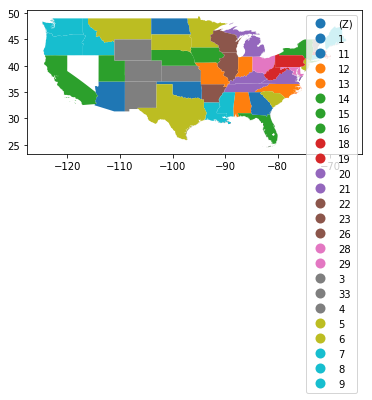

In [100]:
states_ccd.plot(column='Percent lost % Q1',legend=True);